<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat      6497 non-null   float64
 1   quality  6497 non-null   float64
 2   price    6497 non-null   float64
 3   margin   6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
      sat  quality  price  margin
0     7.2    4.440   4.77    0.78
1     8.5    6.300   5.46    0.57
2     9.4    4.104   5.48    0.46
3     7.4   11.660   5.23    0.39
4     6.2    2.970   5.03    0.40
...   ...      ...    ...     ...
6492  8.7    6.744   6.24    0.24
6493  9.3   11.985   5.40    0.70
6494  9.1   12.900   5.46    0.27
6495  6.2    7.210   3.79    0.70
6496  8.8    5.697   6.07    0.79

[6497 rows x 4 columns]
           sat   quality     price    margin
0    -0.085550 -1.410939 -0.514033  1.811564
1     0.731274 -0.961146  0.056870  0.481408
2     1.296767 -1.492192  0.073417 -0.215341
3     0.040

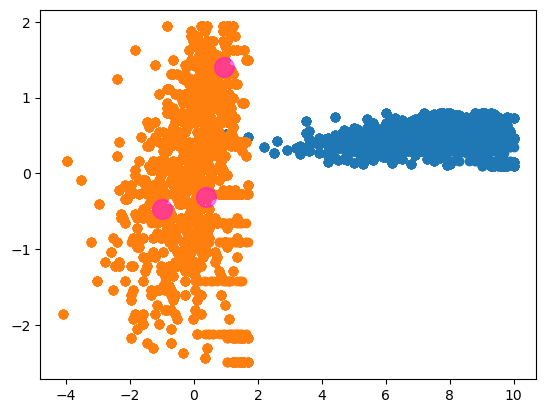

In [13]:
###### import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import silhouette_score 

## import csv file  with data, transformed into Data frame and review 

WineDF = pd.read_csv(r"C:\Users\me\Downloads\wineTransactions.csv")
len(WineDF.index)
WineDF.head()
WineDF.shape
WineDF.columns

############## isolate the relevant variables for clustering 
######## clustering algorithms work with only numeric values


wine = WineDF[[ 'sat', 'quality', 'price', 'margin']]
wine.head()
wine.columns
wine.shape
wine.info()
print (wine)
###### scatter plot of the data set 

plt.scatter(wine.iloc[:, :1].values, wine.iloc[:,-1].values, cmap='viridis');

### standardize the  data so they have comparable range 
## inspect tthe new values
scaler = ss()
cols =wine.columns
scaledDF = pd.DataFrame( data = scaler.fit_transform(wine), columns=cols)

plt.scatter(scaledDF.iloc[:, :1].values, scaledDF.iloc[:,-1].values, cmap='viridis');
print(scaledDF)

################################K means with 3 clusters 

KMNS = KMeans(init= "random", n_clusters=3, n_init =10, max_iter =300, random_state=42, verbose=0 )
KMNS.fit(scaledDF)
centers = KMNS.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, color = 'magenta');



################################################ isolate cluster for raw data set data 

labels = KMNS.fit_predict(scaledDF)
print(labels)

cluster1 = wine[labels == 0]
cluster2 = wine[labels == 1]
cluster3 = wine[labels == 2]


cluster1.columns
len(cluster1)
len(cluster2)

cluster1.describe()

data = {'clusters':['C1', 'C2', 'C3'], 
'size':[len(cluster1), len(cluster2), len(cluster3)],
'sat': [cluster1['sat'].mean(), cluster2['sat'].mean(), cluster3['sat'].mean()],
'quality': [cluster1['quality'].mean(), cluster2['quality'].mean(), cluster3['quality'].mean()],
'price': [cluster1['price'].mean(), cluster2['price'].mean(),cluster3['price'].mean()],
'margin' :[cluster1['margin'].mean(),cluster2['margin'].mean(), cluster3['margin'].mean()] 
}
wineclustdf=pd.DataFrame(data)
print(wineclustdf)

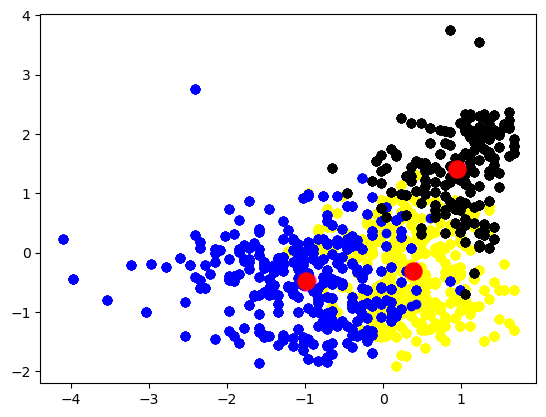

In [14]:
centers = KMNS.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=200, alpha=0.5);
#labels = KMNS.fit_predict(scaledDF)

cluster1S = scaledDF[labels == 0]
cluster2S = scaledDF[labels == 1]
cluster3S = scaledDF[labels == 2]
cluster4S = scaledDF[labels == 3]


cluster1S.columns
len(cluster1S)
len(cluster2S)
plt.scatter(cluster1S.iloc[:,0] , cluster1S.iloc[:,1], color = 'yellow')
plt.scatter(cluster2S.iloc[:,0] , cluster2S.iloc[:,1], color = 'blue')
plt.scatter(cluster3S.iloc[:,0] , cluster3S.iloc[:,1], color = 'black')
plt.scatter(cluster4S.iloc[:,0] , cluster4S.iloc[:,1], color = 'green')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=1.0 )
plt.show()

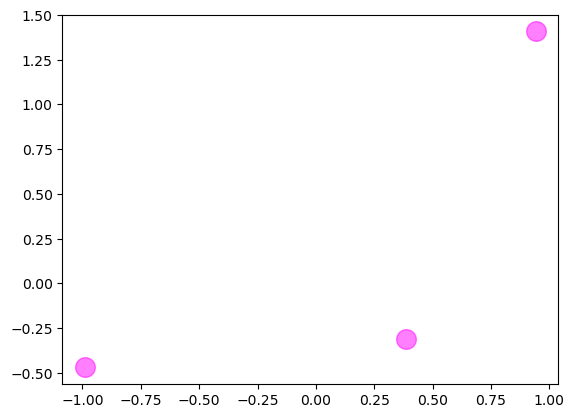

In [15]:
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, color = 'magenta');

In [16]:
cluster3.to_csv('cluster3_KMNS.csv', index=False)

In [17]:
df=pd.read_csv('cluster3_KMNS.csv')
df.head()

,sat,quality,price,margin
0,9.3,13.600,7.25,0.70
1,7.2,16.624,6.56,0.48
2,8.4,13.592,7.54,0.64
3,9.9,17.000,7.51,0.16
4,10.0,17.230,8.05,0.10


NameError: name 'column_name' is not defined

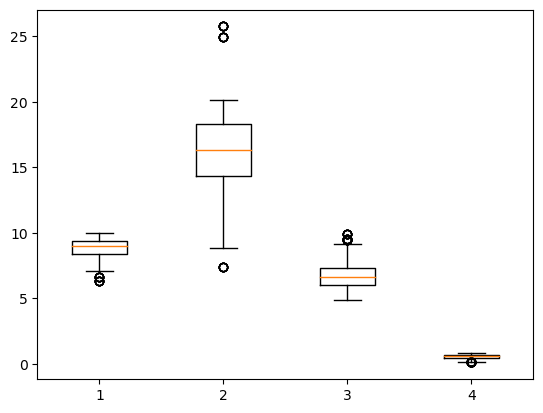

In [18]:
plt.boxplot(df)
plt.title(f'Boxplot for Cluster 4 - {column_name}')
plt.xlabel('Cluster 4')
plt.ylabel(column_name)
plt.show()